# Data anlysis of CalcioTrend
We are going to analyze the data of CalcioTrend

### Import the libraries

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import folium
from geopy.geocoders import Nominatim
from datetime import datetime 

In [72]:
app = pd.read_csv("Assignment_Data/appearances.csv")
club_games = pd.read_csv("Assignment_Data/club_games.csv")
clubs = pd.read_csv("Assignment_Data/clubs.csv")
competitions = pd.read_csv("Assignment_Data/competitions.csv")
game_events = pd.read_csv("Assignment_Data/game_events.csv")
game_lineups = pd.read_csv("Assignment_Data/game_lineups.csv")
games = pd.read_csv("Assignment_Data/games.csv")
player_valuations = pd.read_csv("Assignment_Data/player_valuations.csv")
players = pd.read_csv("Assignment_Data/players.csv")

## Data understanding
Let's observe the data to see how they are composed

In [73]:
app.shape #Numero righe/colonne del dataset
app.head() #Primi 5 elementi del dataset
app.columns #Nome delle colonne
app.describe() #Descrizione del dataset

,game_id,player_id,player_club_id,player_current_club_id,yellow_cards,red_cards,goals,assists,minutes_played
count,1.507351e+06,1.507351e+06,1.507351e+06,1.507351e+06,1.507351e+06,1.507351e+06,1.507351e+06,1.507351e+06,1.507351e+06
mean,3.014718e+06,1.798913e+05,2.881502e+03,3.638909e+03,1.490230e-01,3.827244e-03,9.635778e-02,7.431050e-02,6.964984e+01
std,5.570794e+05,1.652259e+05,7.113885e+03,9.309395e+03,3.675721e-01,6.174624e-02,3.318755e-01,2.834195e-01,2.976078e+01
min,2.211607e+06,1.000000e+01,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.518634e+06,5.369600e+04,2.890000e+02,3.360000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.200000e+01
50%,2.917390e+06,1.271420e+05,8.550000e+02,9.310000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+01
75%,3.450701e+06,2.608060e+05,2.441000e+03,2.687000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+01
max,4.227848e+06,1.186012e+06,8.367800e+04,8.367800e+04,2.000000e+00,1.000000e+00,6.000000e+00,6.000000e+00,1.200000e+02


## Data preparation
Data cleaning

In [74]:
print(app.isna().sum()) #Controlla se ci sono valori nulli
print(club_games.isna().sum())

appearance_id               0
game_id                     0
player_id                   0
player_club_id              0
player_current_club_id      0
date                        0
player_name               324
competition_id              0
yellow_cards                0
red_cards                   0
goals                       0
assists                     0
minutes_played              0
dtype: int64
game_id                      0
club_id                      0
own_goals                    0
own_position             38908
own_manager_name          1484
opponent_id                  0
opponent_goals               0
opponent_position        38908
opponent_manager_name     1484
hosting                      0
is_win                       0
dtype: int64


In [75]:
app.dropna(inplace=True) #Rimuove i valori nulli
club_games.dropna(inplace=True)

In [76]:
print(app.isna().sum()) #Controlla se ci sono valori nulli
print(club_games.isna().sum())

appearance_id             0
game_id                   0
player_id                 0
player_club_id            0
player_current_club_id    0
date                      0
player_name               0
competition_id            0
yellow_cards              0
red_cards                 0
goals                     0
assists                   0
minutes_played            0
dtype: int64
game_id                  0
club_id                  0
own_goals                0
own_position             0
own_manager_name         0
opponent_id              0
opponent_goals           0
opponent_position        0
opponent_manager_name    0
hosting                  0
is_win                   0
dtype: int64


In [77]:
app.loc[app.duplicated()] #Controlla se ci sono valori duplicati

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played


## Data analysis
In this section, we will analyze the number of appearances for each player and visualize the top 20 players with the most appearances.


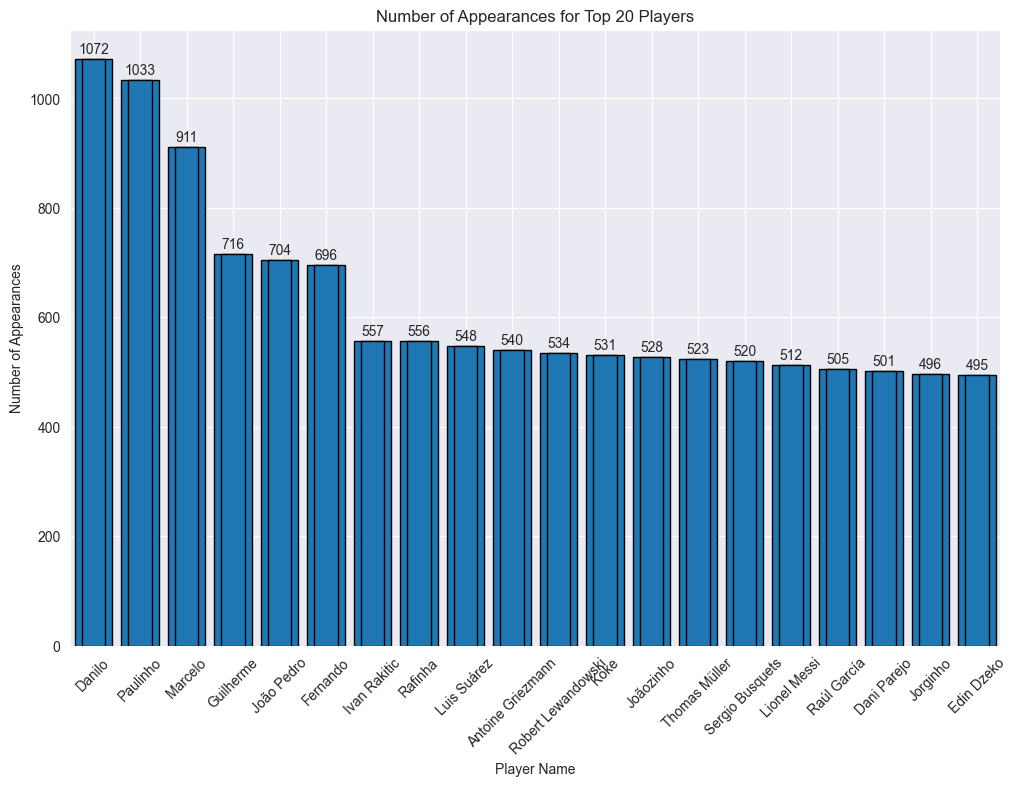

In [78]:
# Calcola il numero di apparizioni per giocatore
merged_data = app.merge(players, on='player_id')
appearances_per_player = merged_data.groupby('name')['appearance_id'].count()

# Ordina i giocatori per numero di apparizioni in ordine decrescente
top_players = appearances_per_player.sort_values(ascending=False)

# Seleziona i primi 10 giocatori
top_20_players = top_players.head(20)

# Crea un grafico a barre utilizzando i valori delle apparizioni e i nomi dei giocatori
plt.figure(figsize=(12, 8))
bars = plt.bar(top_20_players.index, top_20_players.values, edgecolor='black')
top_20_players.plot(kind='bar', edgecolor='black')
plt.xlabel('Player Name')
plt.ylabel('Number of Appearances')
plt.title('Number of Appearances for Top 20 Players')
plt.xticks(rotation=45)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', va='bottom')

plt.show()

Now we compare the number of goals scored by each player and visualize the top 20 players with the most goals.

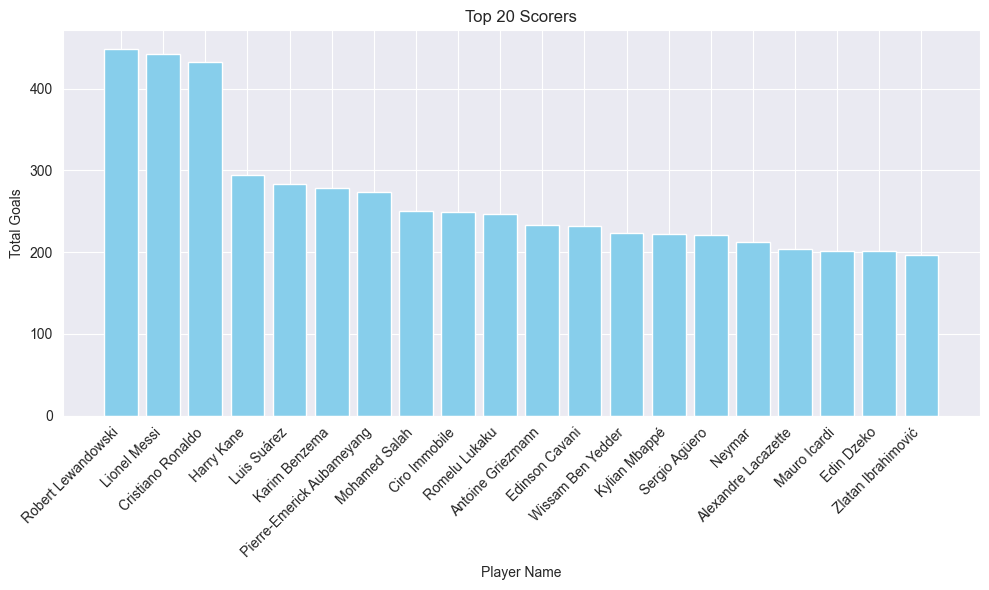

In [79]:

goals_events =game_events[game_events['type'] == 'Goals']

players_goals = goals_events.groupby('player_id').size().reset_index(name='total_goals')
top_scorers = players_goals.merge(players, on='player_id')
top_scorers = top_scorers.sort_values(by='total_goals', ascending=False).head(20)

#bar chart 
plt.figure(figsize=(10, 6))
plt.bar(top_scorers['name'], top_scorers['total_goals'], color='skyblue')
plt.xlabel('Player Name')
plt.ylabel('Total Goals')
plt.title('Top 20 Scorers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

We compare the assists made by a player with their goals. We use a sample composed of 20 players.

<Figure size 1000x600 with 0 Axes>

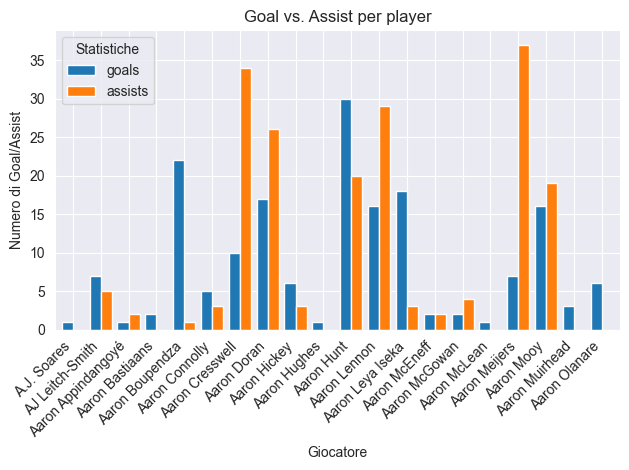

In [80]:
grouped_app = app.groupby('player_name')[['goals', 'assists']].sum()
grouped_app = grouped_app [(grouped_app['goals'] > 0) | (grouped_app['assists'] > 0)]
grouped_app = grouped_app.head(20)

# Grafico a barre (Rappresenta dati disctreti ogni barra rappresenta un giocatore
plt.figure(figsize=(10, 6))
grouped_app.plot(kind='bar', width=0.8)
plt.title('Goal vs. Assist per player')
plt.xlabel('Giocatore')
plt.ylabel('Numero di Goal/Assist')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Statistiche')
plt.tight_layout()
plt.show()

We can observe that there is not a directly proportional relationship between goals and assists for the same player

This scatter plot helps to examine if there's any correlation between the amount of time players spend on the field and the number of yellow cards they receive.

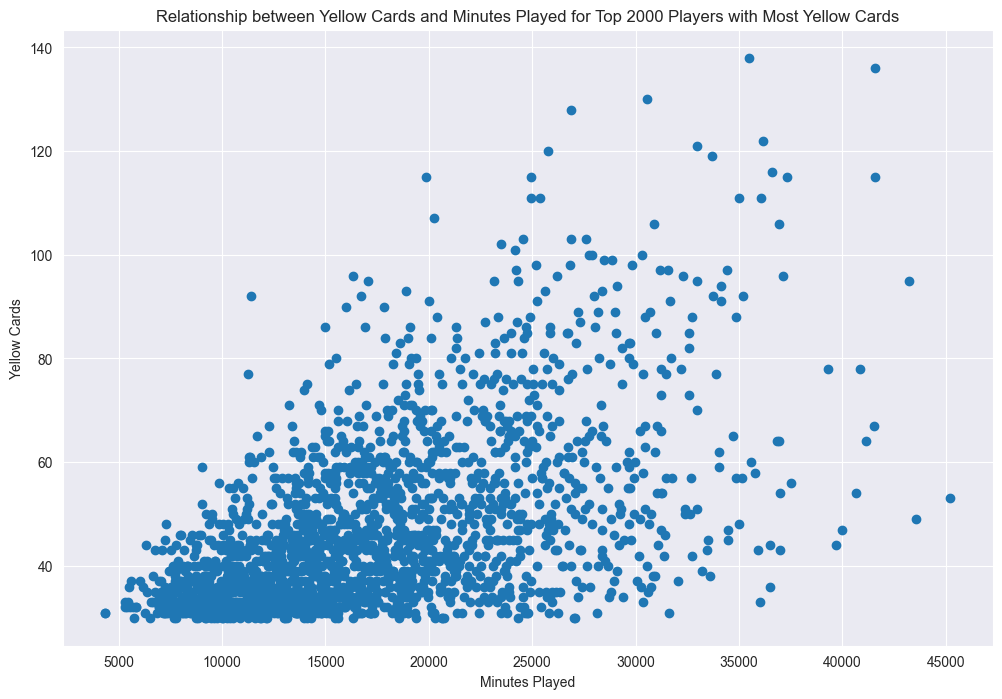

In [81]:
yellow_cards_per_player = app.groupby('player_id')['yellow_cards'].sum()
top_20_yellow_cards = yellow_cards_per_player.sort_values(ascending=False).head(2000)

minutes_played_per_player = app.groupby('player_id')['minutes_played'].sum()
top_20_minutes_played = minutes_played_per_player[top_20_yellow_cards.index]

plt.figure(figsize=(12, 8))
plt.scatter(top_20_minutes_played, top_20_yellow_cards)
plt.xlabel('Minutes Played')
plt.ylabel('Yellow Cards')
plt.title('Relationship between Yellow Cards and Minutes Played for Top 2000 Players with Most Yellow Cards')

plt.show()



### Top scorers Analysis

In [82]:
goals_events =game_events[game_events['type'] == 'Goals']
players_goals = goals_events.groupby('player_id').size().reset_index(name='total_goals')
top_scorers = players_goals.merge(players, on='player_id')
top_scorers = top_scorers.sort_values(by='total_goals', ascending=False).head(10)

top_scorers.head(10)

,player_id,total_goals,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,...,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name
2229,38253,449,Robert,Lewandowski,Robert Lewandowski,2023,131,robert-lewandowski,Poland,Warszawa,...,right,185.0,30000000.0,90000000.0,2026-06-30 00:00:00,Gol International,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/robert-lewando...,ES1,FC Barcelona
1583,28003,443,Lionel,Messi,Lionel Messi,2022,583,lionel-messi,Argentina,Rosario,...,left,170.0,35000000.0,180000000.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/lionel-messi/p...,FR1,Paris Saint-Germain
502,8198,433,NaN,Cristiano Ronaldo,Cristiano Ronaldo,2022,985,cristiano-ronaldo,Portugal,Funchal,...,right,187.0,15000000.0,120000000.0,2025-06-30 00:00:00,Gestifute,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/cristiano-rona...,GB1,Manchester United
6547,132098,294,Harry,Kane,Harry Kane,2023,27,harry-kane,England,London,...,right,188.0,90000000.0,150000000.0,2027-06-30 00:00:00,CK66,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/harry-kane/pro...,L1,Bayern Munich
2595,44352,283,Luis,Suárez,Luis Suárez,2021,13,luis-suarez,Uruguay,Salto,...,right,182.0,4000000.0,90000000.0,2024-12-31 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/luis-suarez/pr...,ES1,Atlético de Madrid
1071,18922,279,Karim,Benzema,Karim Benzema,2022,418,karim-benzema,France,Lyon,...,right,185.0,25000000.0,60000000.0,2026-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/karim-benzema/...,ES1,Real Madrid
3613,58864,274,Pierre-Emerick,Aubameyang,Pierre-Emerick Aubameyang,2023,244,pierre-emerick-aubameyang,France,Laval,...,right,187.0,4000000.0,75000000.0,2026-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/pierre-emerick...,FR1,Olympique Marseille
6957,148455,251,NaN,Mohamed Salah,Mohamed Salah,2023,31,mohamed-salah,Egypt,"Nagrig, Basyoun",...,left,175.0,65000000.0,150000000.0,2025-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/mohamed-salah/...,GB1,Liverpool FC
5659,105521,249,Ciro,Immobile,Ciro Immobile,2023,398,ciro-immobile,Italy,Torre Annunziata,...,right,185.0,15000000.0,50000000.0,2026-06-30 00:00:00,Gea World,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/ciro-immobile/...,IT1,SS Lazio
5369,96341,247,Romelu,Lukaku,Romelu Lukaku,2023,12,romelu-lukaku,Belgium,Antwerpen,...,left,191.0,40000000.0,100000000.0,2024-06-30 00:00:00,TEAM LUKAKU,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/romelu-lukaku/...,IT1,AS Roma


### Competitions Analysis
Now we will analyze the number of games played in each competition and visualize the top 10 competitions with the most games.

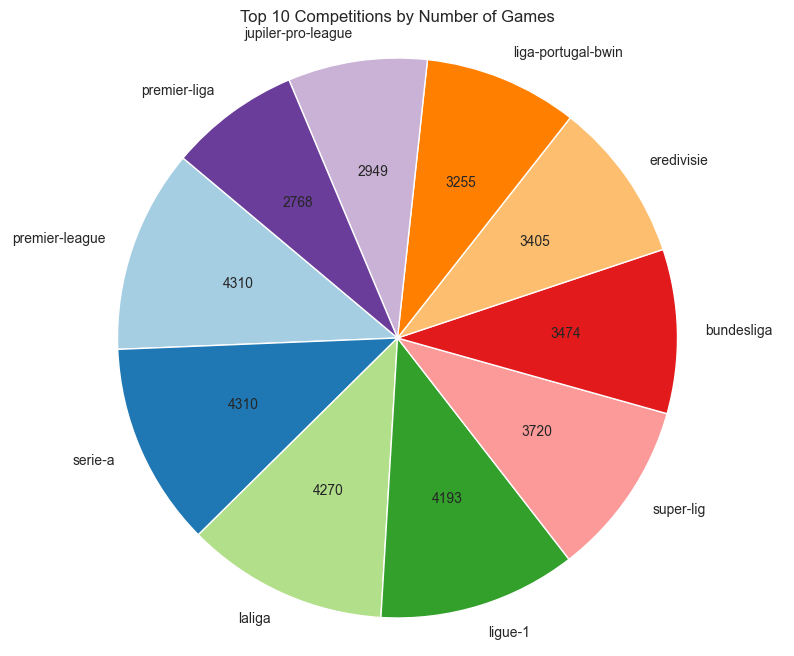

In [83]:
competitions_games = games.groupby('competition_id').size().reset_index(name='total_games')
competition_performance = competitions_games.merge(competitions, on='competition_id')
# Sort competitions by the number of games
top_competitions = competition_performance.sort_values(by='total_games', ascending=False).head(10)
def all_games(val): a = np.round(val/100.*top_competitions['total_games'].sum(), 0); return int(a)

#pie chart
plt.figure(figsize=(10, 8))
plt.pie(top_competitions['total_games'], labels=top_competitions['name'], autopct=all_games, startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 10 Competitions by Number of Games')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Club performance Analysis
Now we will analyze the performance of clubs based on the number of wins and losses.

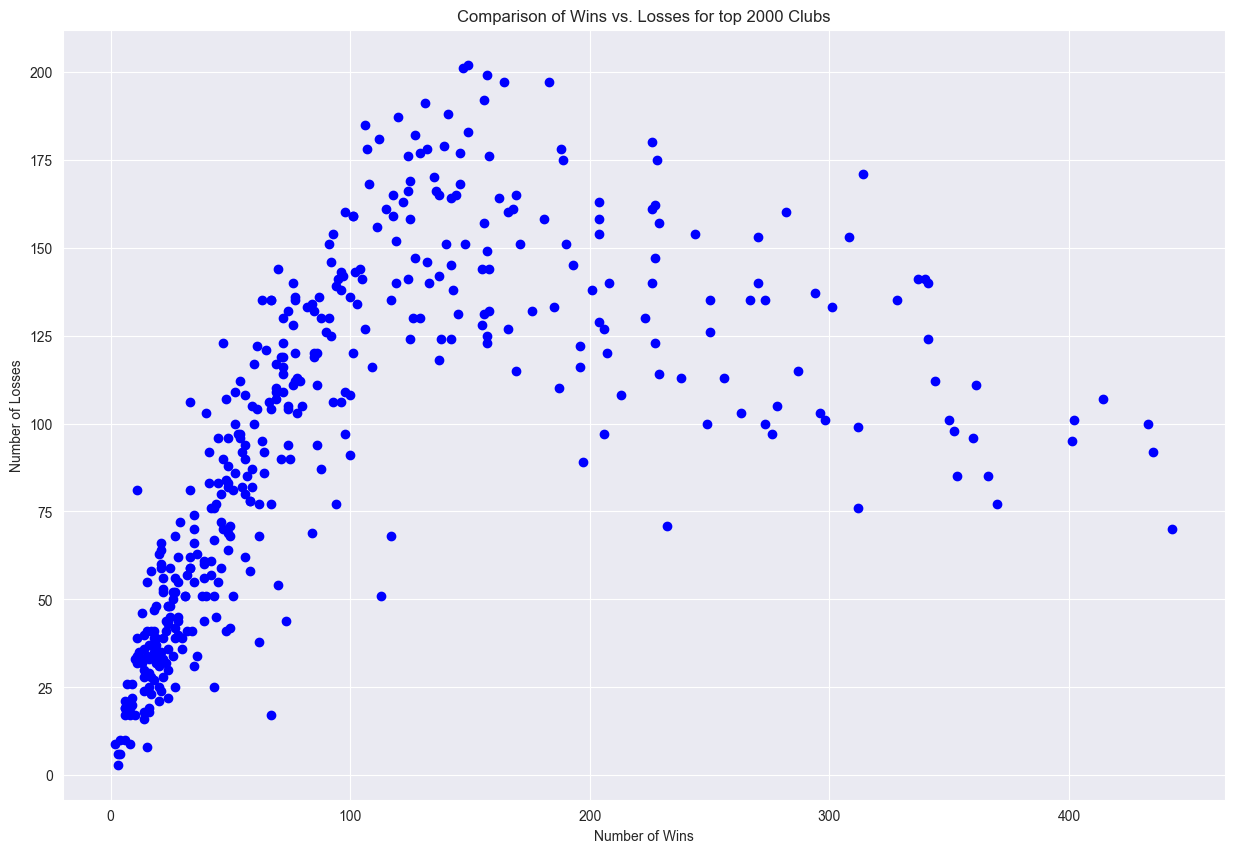

In [84]:
games['home_win'] = games['home_club_goals'] > games['away_club_goals']
games['away_win'] = games['home_club_goals'] < games['away_club_goals']

home_performance = games.groupby('home_club_id').agg(
    total_games=('game_id', 'count'),
    wins=('home_win', 'sum'),
    losses=('away_win', 'sum')
).reset_index()

away_performance = games.groupby('away_club_id').agg(
    total_games=('game_id', 'count'),
    wins=('away_win', 'sum'),
    losses=('home_win', 'sum')
).reset_index()

home_performance.rename(columns={'home_club_id': 'club_id'}, inplace=True)
away_performance.rename(columns={'away_club_id': 'club_id'}, inplace=True)

club_performance = pd.concat([home_performance, away_performance])
club_performance = club_performance.groupby('club_id').sum().reset_index()

club_performance = club_performance.merge(clubs, on='club_id')

top_clubs = club_performance.sort_values(by='wins', ascending=False).head(2000)

plt.figure(figsize=(15, 10))
plt.scatter(top_clubs['wins'], top_clubs['losses'], c='blue', label='Losses')
plt.xlabel('Number of Wins')
plt.ylabel('Number of Losses')
plt.title('Comparison of Wins vs. Losses for top 2000 Clubs')
plt.show()


The graph shows that the concentration of teams is in the lower left part of the graph this shows the limited number of wins compared to losses. Consequently, teams with a high number of wins compared to losses should be in the bottom right of the graph, but in that part we find a small number of teams.

This script analyzes and visualizes the average attendance and number of games played per month in the year 2023, providing insights into attendance patterns across different months.

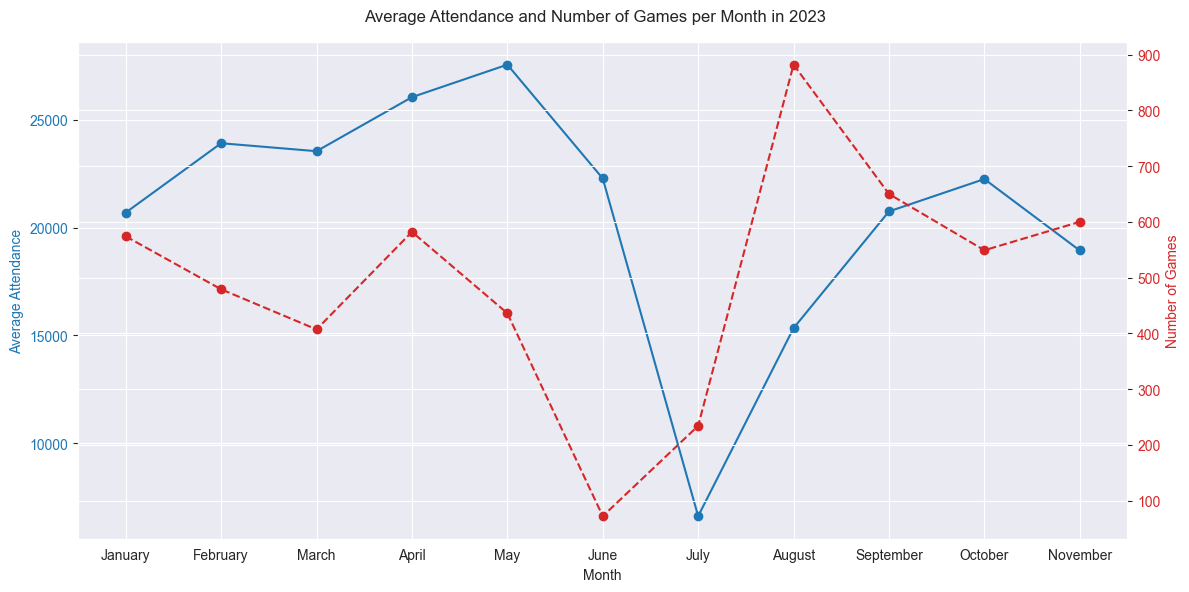

In [85]:
games['date'] = pd.to_datetime(games['date'])

games_2023 = games[(games['date'] >= '2023-01-01') & (games['date'] <= '2023-12-31')].copy()

games_2023['month'] = games_2023['date'].dt.month

month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
games_2023['month_name'] = games_2023['month'].map(month_names)

monthly_attendance = games_2023.groupby('month_name')['attendance'].mean().reindex(month_names.values())

monthly_games_count = games_2023['month_name'].value_counts().reindex(month_names.values())

fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Attendance', color=color)
ax1.plot(monthly_attendance.index, monthly_attendance.values, marker='o', linestyle='-', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Number of Games', color=color)
ax2.plot(monthly_games_count.index, monthly_games_count.values, marker='o', linestyle='--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.suptitle('Average Attendance and Number of Games per Month in 2023')

fig.tight_layout()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

From the graph we can see how the season affects the 'following' of the matches, in fact we can see that although there were many matches in August, the following was less. Whereas we can see that in January and September the number of matches and the following are proportionate.

Now we will analyze the distribution of the age at which players made their debut.

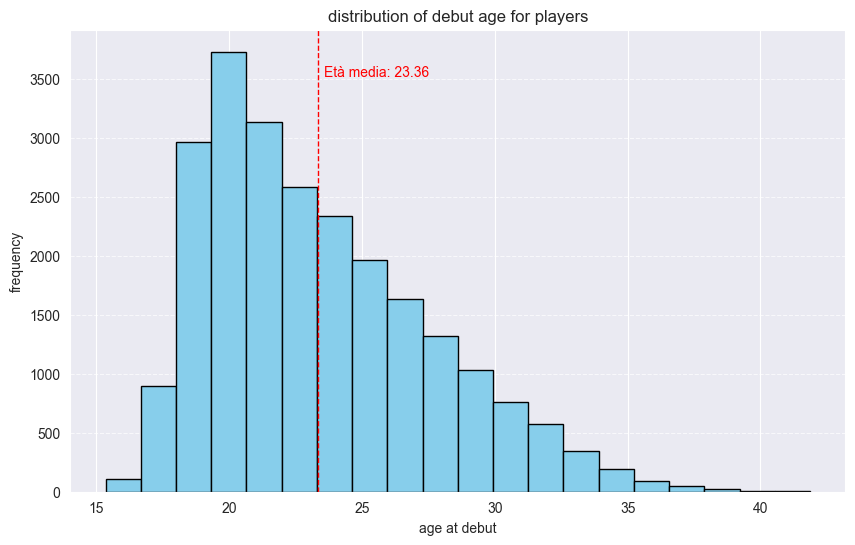

In [86]:
players['date_of_birth'] = pd.to_datetime(players['date_of_birth'])
app['date'] = pd.to_datetime(app['date'])

first_appearances = app.groupby('player_id')['date'].min().reset_index()
first_appearances.rename(columns={'date': 'debut_date'}, inplace=True)

player_debut = first_appearances.merge(players[['player_id', 'date_of_birth']], on='player_id')

player_debut['debut_age'] = (player_debut['debut_date'] - player_debut['date_of_birth']).dt.days / 365.25

average_debut_age = player_debut['debut_age'].mean()

plt.figure(figsize=(10, 6))
plt.hist(player_debut['debut_age'], bins=20, color='skyblue', edgecolor='black')
plt.axvline(average_debut_age, color='red', linestyle='dashed', linewidth=1)
plt.xlabel('age at debut')
plt.ylabel('frequency')
plt.title('distribution of debut age for players')
plt.text(average_debut_age + 0.2, plt.ylim()[1] * 0.9, f'Età media: {average_debut_age:.2f}', color='red')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


With this histogram we can see the distribution of the age at which the players made their debut. The average age at debut is 23.36 years.

Now we will analyze the relationship between the age of the players and the market value.

In [89]:
def calculate_age(birthdate):
    if pd.isna(birthdate):
        return None
    birthdate = datetime.strptime(str(birthdate), '%Y-%m-%d')
    today = datetime.today()
    age = today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))
    return age

players['age'] = players['date_of_birth'].apply(calculate_age)

players_cleaned = players.dropna(subset=['age', 'market_value_in_eur'])

# Grafico a dispersione dell'età contro il valore di mercato
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='market_value_in_eur', data=players_cleaned)
plt.title('Relazione tra età e valore di mercato dei giocatori')
plt.xlabel('Età')
plt.ylabel('Valore di mercato (in EUR)')
plt.ticklabel_format(style='plain', axis='y')  # Disabilita la notazione scientifica
plt.show()

ValueError: unconverted data remains:  00:00:00

now we can see that the market value of the players is concentrated between 20 and 30 years of age. 

Now we will analyze the relationship between the market value of the players and the number of goals they have scored.

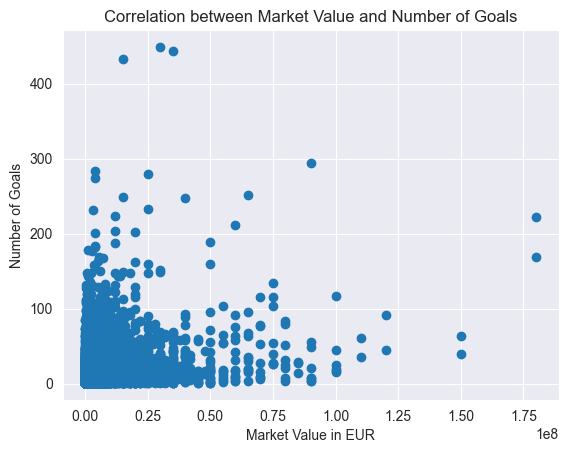

In [90]:
goals_events = game_events[game_events['type'] == 'Goals']

goals_count = goals_events.groupby('player_id').size().reset_index(name='goals_count')

players_goals = pd.merge(players, goals_count, on='player_id')

plt.scatter(players_goals['market_value_in_eur'], players_goals['goals_count'])

plt.title('Correlation between Market Value and Number of Goals')
plt.xlabel('Market Value in EUR')
plt.ylabel('Number of Goals')

plt.show()


The radar chart visually emphasizes which player positions tend to have the most captains based on the dataset provided.

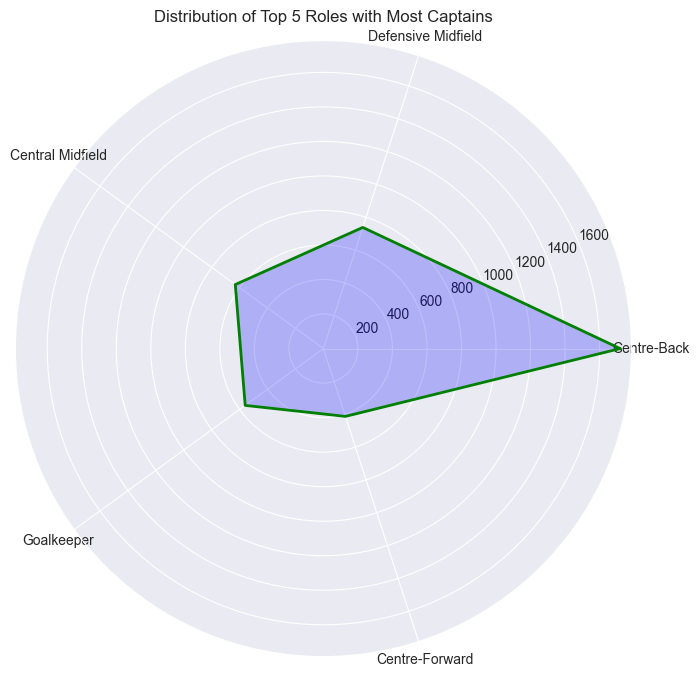

In [91]:
captains = game_lineups[game_lineups['team_captain'] == True]

captain_positions = captains['position'].value_counts()

top_5_roles = captain_positions.head(5)

labels = top_5_roles.index
stats = top_5_roles.values

num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
stats = np.concatenate((stats, [stats[0]]))
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

ax.plot(angles, stats, color='green', linewidth=2, linestyle='solid')

ax.fill(angles, stats, color='blue', alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

plt.title('Distribution of Top 5 Roles with Most Captains')

plt.show()



The radar chart shows that the most common positions for captains are Centre-Back, Central Midfield, and Goalkeeper.

Now we will see the concentration of players with higher market values.

In [96]:
top_players = players.nlargest(100, 'market_value_in_eur')

country_mapping = {
    "England": "United Kingdom",
    "Scotland": "United Kingdom",
    "Wales": "United Kingdom",
    "Northern Ireland": "United Kingdom"
}


top_players['country_of_birth'] = top_players['country_of_birth'].replace(country_mapping)


geolocator = Nominatim(user_agent="geoapiExercises")


top_players['latitude'] = None
top_players['longitude'] = None


for index, row in top_players.iterrows():
    location_query = f"{row['city_of_birth']}, {row['country_of_birth']}"
    location = geolocator.geocode(location_query)
    if location:
        top_players.at[index, 'latitude'] = location.latitude
        top_players.at[index, 'longitude'] = location.longitude


top_players = top_players.dropna(subset=['latitude', 'longitude'])


m = folium.Map(location=[0, 0], zoom_start=2)


for idx, player in top_players.iterrows():
    folium.Marker(
        location=[player['latitude'], player['longitude']],
        popup=f"{player['first_name']} {player['last_name']} ({player['market_value_in_eur']} EUR)"
    ).add_to(m)

m


GeocoderInsufficientPrivileges: Non-successful status code 403

It can be seen from the graph that players with higher market values are concentrated in central Europe and South America

In [93]:
from geopandas.tools import geocode

# Filtrare gli eventi di gioco per i falli
fouls = game_events[game_events['type'] == 'foul']

# Unire i dati degli eventi di gioco con i dati dei giocatori per ottenere le informazioni sulle località
fouls_with_location = fouls.merge(players, left_on='player_id', right_on='player_id')

# Geocodifica delle città di nascita dei giocatori
geocoded_cities = geocode(fouls_with_location['city_of_birth'], provider='nominatim', user_agent="myGeocoder")
fouls_with_location = fouls_with_location.join(geocoded_cities.set_index('address'), on='city_of_birth')

# Creazione di un GeoDataFrame
gdf_fouls = gpd.GeoDataFrame(fouls_with_location, geometry='geometry')

# Caricare i confini mondiali
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filtrare per mantenere solo l'Europa
europe = world[(world.continent == "Europe")]

# Filtrare i falli per mantenere solo quelli in Europa
gdf_fouls_in_europe = gdf_fouls[gdf_fouls.geometry.within(europe.unary_union)]

# Tracciare la mappa
fig, ax = plt.subplots(figsize=(15, 10))
europe.plot(ax=ax, color='lightgrey')

# Raggruppare i falli per città e contare il numero di falli per città
foul_counts = gdf_fouls_in_europe.groupby('geometry').size().reset_index(name='counts')

# Creare un GeoDataFrame per i conteggi dei falli
gdf_foul_counts = gpd.GeoDataFrame(foul_counts, geometry='geometry')

# Tracciare i falli sulla mappa con dimensioni dei punti proporzionali al numero di falli
gdf_foul_counts.plot(ax=ax, column='counts', cmap='Reds', markersize=gdf_foul_counts['counts'] * 10, legend=True)

plt.title('Zone europee con il maggior numero di falli')
plt.show()


ValueError: Assigning CRS to a GeoDataFrame without a geometry column is not supported. Supply geometry using the 'geometry=' keyword argument, or by providing a DataFrame with column name 'geometry'

In [ ]:
# Mappatura dei ruoli a categorie più generiche
role_mapping = {
    'Centre-Forward': 'Attaccante',
    'Right Winger': 'Attaccante',
    'Left Winger': 'Attaccante',
    'Second Striker': 'Attaccante',
    'Attacking Midfield': 'Centrocampista',
    'Central Midfield': 'Centrocampista',
    'Defensive Midfield': 'Centrocampista',
    'Right Midfield': 'Centrocampista',
    'Left Midfield': 'Centrocampista',
    'Right-Back': 'Difensore',
    'Left-Back': 'Difensore',
    'Centre-Back': 'Difensore',
    'Defender': 'Difensore',
    'Sweeper': 'Difensore',
    'Goalkeeper': 'Portiere'
}

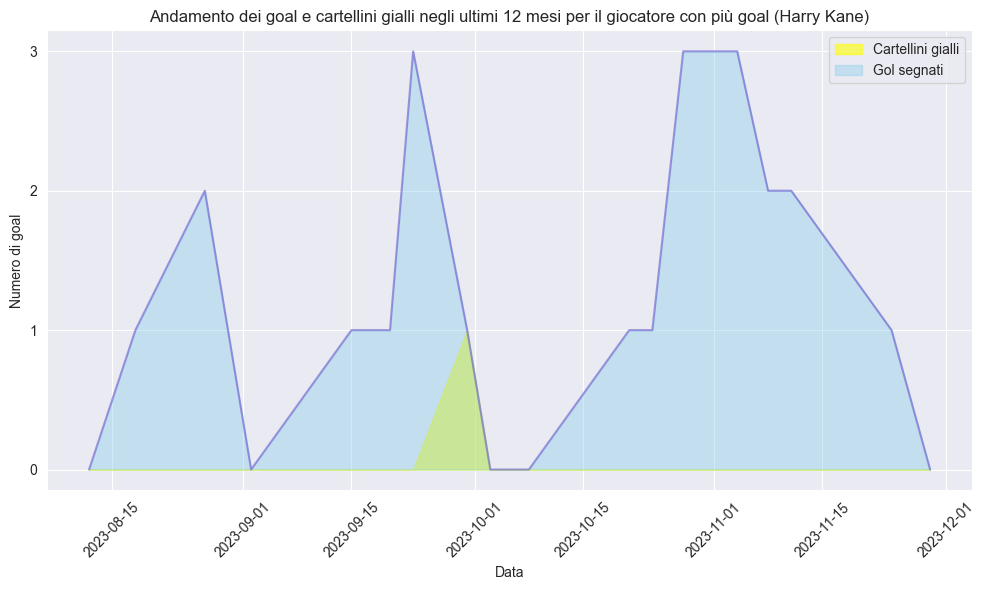

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Caricamento dei dati
appearances = pd.read_csv("Assignment_Data/appearances.csv")
players = pd.read_csv("Assignment_Data/players.csv")

# Calcolo della data un anno fa
one_year_ago = datetime.now() - timedelta(days=365)

# Filtraggio delle partite giocate nell'ultimo anno
appearances_last_year = appearances[pd.to_datetime(appearances['date']) >= one_year_ago]

# Trova il giocatore che ha segnato più goal nell'ultimo anno
player_goals = appearances_last_year.groupby('player_id')['goals'].sum().reset_index()
player_most_goals_id = player_goals.loc[player_goals['goals'].idxmax()]['player_id']

# Filtra le apparizioni del giocatore che ha segnato più goal nell'ultimo anno
player_appearances = appearances_last_year[appearances_last_year['player_id'] == player_most_goals_id]

# Somma dei cartellini gialli presi dal giocatore nell'ultimo anno
player_yellow_cards = player_appearances['yellow_cards'].sum()

# Creazione del DataFrame per il grafico
player_performance = player_appearances[['date', 'goals']].copy()
player_performance['yellow_cards'] = player_appearances['yellow_cards']

# Conversione della colonna 'date' in formato datetime
player_performance['date'] = pd.to_datetime(player_performance['date'])

# Ordinamento per data
player_performance.sort_values(by='date', inplace=True)

# Creazione del grafico area
plt.figure(figsize=(10, 6))

# Grafico dei cartellini gialli (davanti)
plt.fill_between(player_performance['date'], player_performance['yellow_cards'], color='yellow', alpha=0.6, label='Cartellini gialli')

# Grafico dei goal segnati (dietro)
plt.fill_between(player_performance['date'], player_performance['goals'], color='skyblue', alpha=0.4, label='Gol segnati')
plt.plot(player_performance['date'], player_performance['goals'], color='Slateblue', alpha=0.6)

plt.xlabel('Data')
plt.ylabel('Numero di goal')
plt.title(f'Andamento dei goal e cartellini gialli negli ultimi 12 mesi per il giocatore con più goal ({players[players["player_id"] == player_most_goals_id]["name"].values[0]})')
plt.legend()
plt.xticks(rotation=45)
plt.yticks(range(0, max(player_performance['goals']) + 1))  # Imposta i tick sull'asse y come numeri interi senza virgola
plt.tight_layout()
plt.grid(True)
plt.show()



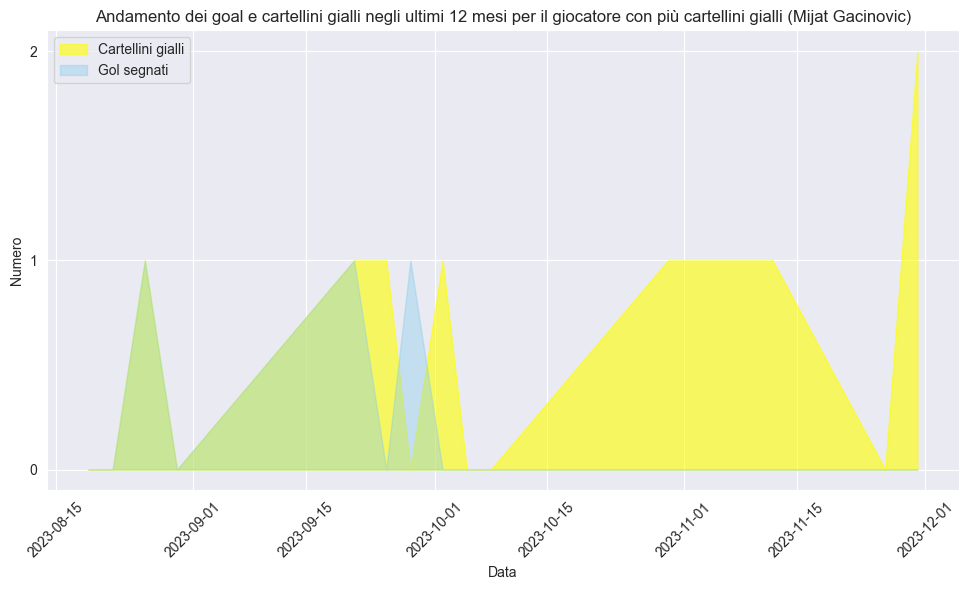

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from datetime import datetime, timedelta

# Caricamento dei dati
appearances = pd.read_csv("Assignment_Data/appearances.csv")
players = pd.read_csv("Assignment_Data/players.csv")

# Calcolo della data un anno fa
one_year_ago = datetime.now() - timedelta(days=365)

# Filtraggio delle partite giocate nell'ultimo anno
appearances_last_year = appearances[pd.to_datetime(appearances['date']) >= one_year_ago]

# Trova il giocatore che ha preso più cartellini gialli nell'ultimo anno
player_yellow_cards = appearances_last_year.groupby('player_id')['yellow_cards'].sum().reset_index()
player_most_yellow_cards_id = player_yellow_cards.loc[player_yellow_cards['yellow_cards'].idxmax()]['player_id']

# Filtra le apparizioni del giocatore che ha preso più cartellini gialli nell'ultimo anno
player_appearances = appearances_last_year[appearances_last_year['player_id'] == player_most_yellow_cards_id]

# Creazione del DataFrame per il grafico
player_performance = player_appearances[['date', 'goals', 'yellow_cards']].copy()

# Conversione della colonna 'date' in formato datetime
player_performance['date'] = pd.to_datetime(player_performance['date'])

# Ordinamento per data
player_performance.sort_values(by='date', inplace=True)

# Creazione del grafico area
plt.figure(figsize=(10, 6))

# Grafico dei cartellini gialli (davanti)
plt.fill_between(player_performance['date'], player_performance['yellow_cards'], color='yellow', alpha=0.6, label='Cartellini gialli')

# Grafico dei goal segnati (dietro)
plt.fill_between(player_performance['date'], player_performance['goals'], color='skyblue', alpha=0.4, label='Gol segnati')

plt.xlabel('Data')
plt.ylabel('Numero')
plt.title(f'Andamento dei goal e cartellini gialli negli ultimi 12 mesi per il giocatore con più cartellini gialli ({players[players["player_id"] == player_most_yellow_cards_id]["name"].values[0]})')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)

# Imposta l'asse y per mostrare solo numeri interi
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()
